In [1]:
input_str=input("意味類似度ネットワークを作りたい単語を入力してください===>")

In [4]:
from gensim.models import Word2Vec

# 学習済みモデルのロード
model_file_path = '../../KITERETU/gw2v160.model'
model = Word2Vec.load(model_file_path)

# モデル内に登録されている単語リストの長さをlen関数で見る（＝単語数）
print(len(model.wv.key_to_index))

# 「群馬」に似ている単語TOP7を書き出す
out = model.wv.most_similar(positive=[input_str], topn=10)
print(out)


293753


NameError: name 'input_str' is not defined

In [3]:
print(out)

#AtCoderでよく使う辞書処理を使って県と数値を取り出す
pre=[]
for prefecture, value in out:
    print(prefecture, value)
    pre.append(prefecture)

[('群馬県', 0.7760874032974243), ('栃木', 0.7456161379814148), ('前橋', 0.7389767169952393), ('埼玉', 0.7216979265213013), ('高崎', 0.6891007423400879), ('伊勢崎', 0.6693983674049377), ('茨城', 0.6651455163955688), ('高崎市', 0.6536263227462769), ('群馬県前橋市', 0.6474608778953552), ('栃木県', 0.6421990990638733)]
群馬県 0.7760874032974243
栃木 0.7456161379814148
前橋 0.7389767169952393
埼玉 0.7216979265213013
高崎 0.6891007423400879
伊勢崎 0.6693983674049377
茨城 0.6651455163955688
高崎市 0.6536263227462769
群馬県前橋市 0.6474608778953552
栃木県 0.6421990990638733


実装方式に教授の考え方をそのまま応用<br>

それぞれのネットワーク的な接続を数値で表す。<br>
表し方としては、2次元配列を用いる<br>

In [6]:
import pandas

df = pandas.crosstab(pre, pre)
df

col_0,伊勢崎,前橋,埼玉,栃木,栃木県,群馬県,群馬県前橋市,茨城,高崎,高崎市
row_0,,,,,,,,,,
伊勢崎,1,0,0,0,0,0,0,0,0,0
前橋,0,1,0,0,0,0,0,0,0,0
埼玉,0,0,1,0,0,0,0,0,0,0
栃木,0,0,0,1,0,0,0,0,0,0
栃木県,0,0,0,0,1,0,0,0,0,0
群馬県,0,0,0,0,0,1,0,0,0,0
群馬県前橋市,0,0,0,0,0,0,1,0,0,0
茨城,0,0,0,0,0,0,0,1,0,0
高崎,0,0,0,0,0,0,0,0,1,0


In [12]:
for i in pre:
    for j in pre:
        #0を除外する処理を入れていないので計算数がその分多い
        df.loc[i,j]=model.wv.similarity(i,j)
        print(df.loc[i,j])
        #print(df.loc['Bob', 'age'])
        #df.iloc[1,0]

1
0.5918216705322266
0.591719388961792
0.6326767802238464
0.6295509338378906
0.6095383167266846
0.6084958910942078
0.7073972821235657
0.6774795055389404
0.8213344812393188
0.5918216705322266
1.0
0.6043607592582703
0.6700299978256226
0.581305980682373
0.5531969666481018
0.6931885480880737
0.5274909138679504
0.5314280986785889
0.7412744760513306
0.591719388961792
0.6043607592582703
1.0
0.6039961576461792
0.7543151378631592
0.7266143560409546
0.5755583047866821
0.7066522836685181
0.6305983662605286
0.5202921628952026
0.6326767802238464
0.6700299978256226
0.6039961576461792
1.0
0.6105243563652039
0.5599026679992676
0.6691727638244629
0.5449333786964417
0.508543848991394
0.574725866317749
0.6295509338378906
0.581305980682373
0.7543151378631592
0.6105243563652039
1.0
0.6967921853065491
0.5794363021850586
0.6546974778175354
0.545935332775116
0.5461968183517456
0.6095383167266846
0.5531969666481018
0.7266143560409546
0.5599026679992676
0.6967921853065491
1.0
0.5426161885261536
0.60742509365081

In [13]:
df

col_0,伊勢崎,前橋,埼玉,栃木,栃木県,群馬県,群馬県前橋市,茨城,高崎,高崎市
row_0,,,,,,,,,,
伊勢崎,1.000000,0.726614,0.559903,0.553197,0.568818,0.609538,0.535843,0.542616,0.696792,0.607425
前橋,0.726614,1.000000,0.603996,0.604361,0.520292,0.591719,0.630598,0.575558,0.754315,0.706652
埼玉,0.559903,0.603996,1.000000,0.670030,0.574726,0.632677,0.508544,0.669173,0.610524,0.544933
栃木,0.553197,0.604361,0.670030,1.000000,0.741274,0.591822,0.531428,0.693189,0.581306,0.527491
栃木県,0.568818,0.520292,0.574726,0.741274,1.000000,0.821334,0.590805,0.647337,0.546197,0.584768
群馬県,0.609538,0.591719,0.632677,0.591822,0.821334,1.000000,0.677480,0.608496,0.629551,0.707397
群馬県前橋市,0.535843,0.630598,0.508544,0.531428,0.590805,0.677480,1.000000,0.487713,0.545935,0.631133
茨城,0.542616,0.575558,0.669173,0.693189,0.647337,0.608496,0.487713,1.000000,0.579436,0.517384
高崎,0.696792,0.754315,0.610524,0.581306,0.546197,0.629551,0.545935,0.579436,1.000000,0.654697


c:\Users\IRSL27\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 20234 (\N{CJK UNIFIED IDEOGRAPH-4F0A}) missing from current font.
  fig.canvas.draw()
c:\Users\IRSL27\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 21218 (\N{CJK UNIFIED IDEOGRAPH-52E2}) missing from current font.
  fig.canvas.draw()
c:\Users\IRSL27\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 23822 (\N{CJK UNIFIED IDEOGRAPH-5D0E}) missing from current font.
  fig.canvas.draw()
c:\Users\IRSL27\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from current font.
  fig.canvas.draw()
c:\Users\IRSL27\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 27211 (\N{CJK UNIFIED IDEOGRAPH-6A4B}) missing from current font.
  fig.canvas.draw()
c:\Users\IRSL27\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 22524 (\N{CJK UNIFIED IDEOGRAPH-57FC}) missing from current font.


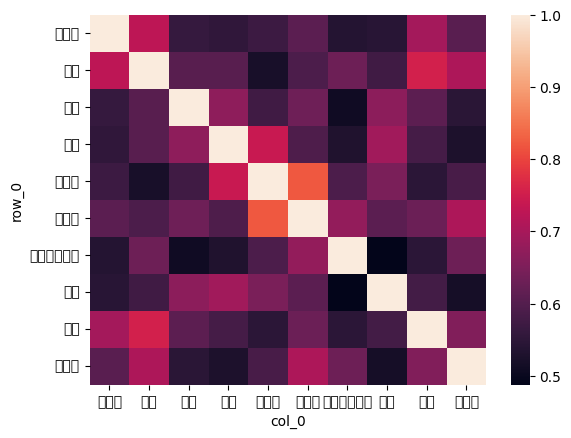

In [15]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure()
sns.heatmap(df)
plt.savefig('eaborn_heatmap_dataframe.png')